# **Introduction**

In this project, our goal is to create a model inspired by Mark Bakker's study, *Simple Groundwater Flow Models For Seawater Intrusion*. Bakker models seawater intrusion in coastal aquifers based off three main characteristics:
1) Groundwater flow is primarly horizontal.
2) The density differences between freshwater and seawater is small (no more than 2.5%).
3) The time period we are focusing on is small (no more than 100 years).

These points are important to note in order to have a more simplified approach that can be applied in engineering problems in coastal aquifers.

The main theme of this study is understanding the intrusion of seawater into freshwater sources. This is very important topic to understand because it is something that impacts all of us. First, groundwater is a water source that is largely used by people for drinking or showering for example. Accoriding to an article, "Climate Adaptation and Saltwater Intrusion" published by the United States Environmental Protection Agency, as sea levels rise, the risk of saltwater intrusion in groundwater, coastal aquifers increases. As a result, the need for water treatment increases, which can be costly. This entails relocating water intakes, developing new or alternative fresh water sources, or needing water treatment tools. These solutions would be vital because saltwater intrusion causes the freshwater sources to greatly diminish in quality and availability, which leads to these water sources to being unusable. This is a serious matter that effects large populations, and a study such as Bakker's opens the door for engineering solutions to understand and prevent such intrusions. Secondly, saltwater intrusion poses a concerning threat on coastal agricuture. The U.S. Department of Agriculture writes in an article, "Saltwater Intrusion: A Growing Threat to Coastal Agriculture", that a large amount of coastal farmlands are lost yearly due to saltwater intrusion because land becomes too wet and salty for crops to survive on, which can be seen in Image 1. This can have a large impact on populations who mainly rely on these lands for food and farmers who rely on the land to grow crops and make money. Ultimately, this concept is important to have an understanding of so we can create solutions that prevent disasters that effect people and their livelihoods.

Bakker's study specifically states that this is a "simple" approach towards modeling seawater intrusion. Given this, our model utilizies more assumptions than other studies on this topic. For example, we assume point 2) from above, that the difference in densities between freshwater and seawater is very small. However, researchers at the Institute for Environmental Research and Sustainable Development, conducted a study called *Efficient Stochastic Simulation of Seawater Intrusion, With Mixing, in Confined Coastal Aquifers*, where they take into account a buoyancy factor, which is calculated using the seawater and freshwater densities. Saltwater density varies in different locations around the world, so by taking into account this factor, their results will be more accurate and tailored towards specific locations. However, we do not take this into account in our model, so we model have a more general and simplified model that is not specific to any region. Secondly, in this project we implement the forward euler method for diffusion equations. However, other studies use other methods and equations that go beyond the scope of this course. For example, *Mathematical models for saltwater intrusion in coastal aquifers* by A.G. Bobba discusses a variety of models that are used for saltwater intrusion problems. Some of these models include, Glovers Model, Charmonman's Solution, Models using Hodograph Techniques, Stratified Aquifer Models, etc. These are very specific models tailored towards certain problems. In our case, we want to create a more general model that can apply to a variety of scenarios, but some research has shown us that there is an extensive selection of models that target more specialized scenarios that require a more accurate result.


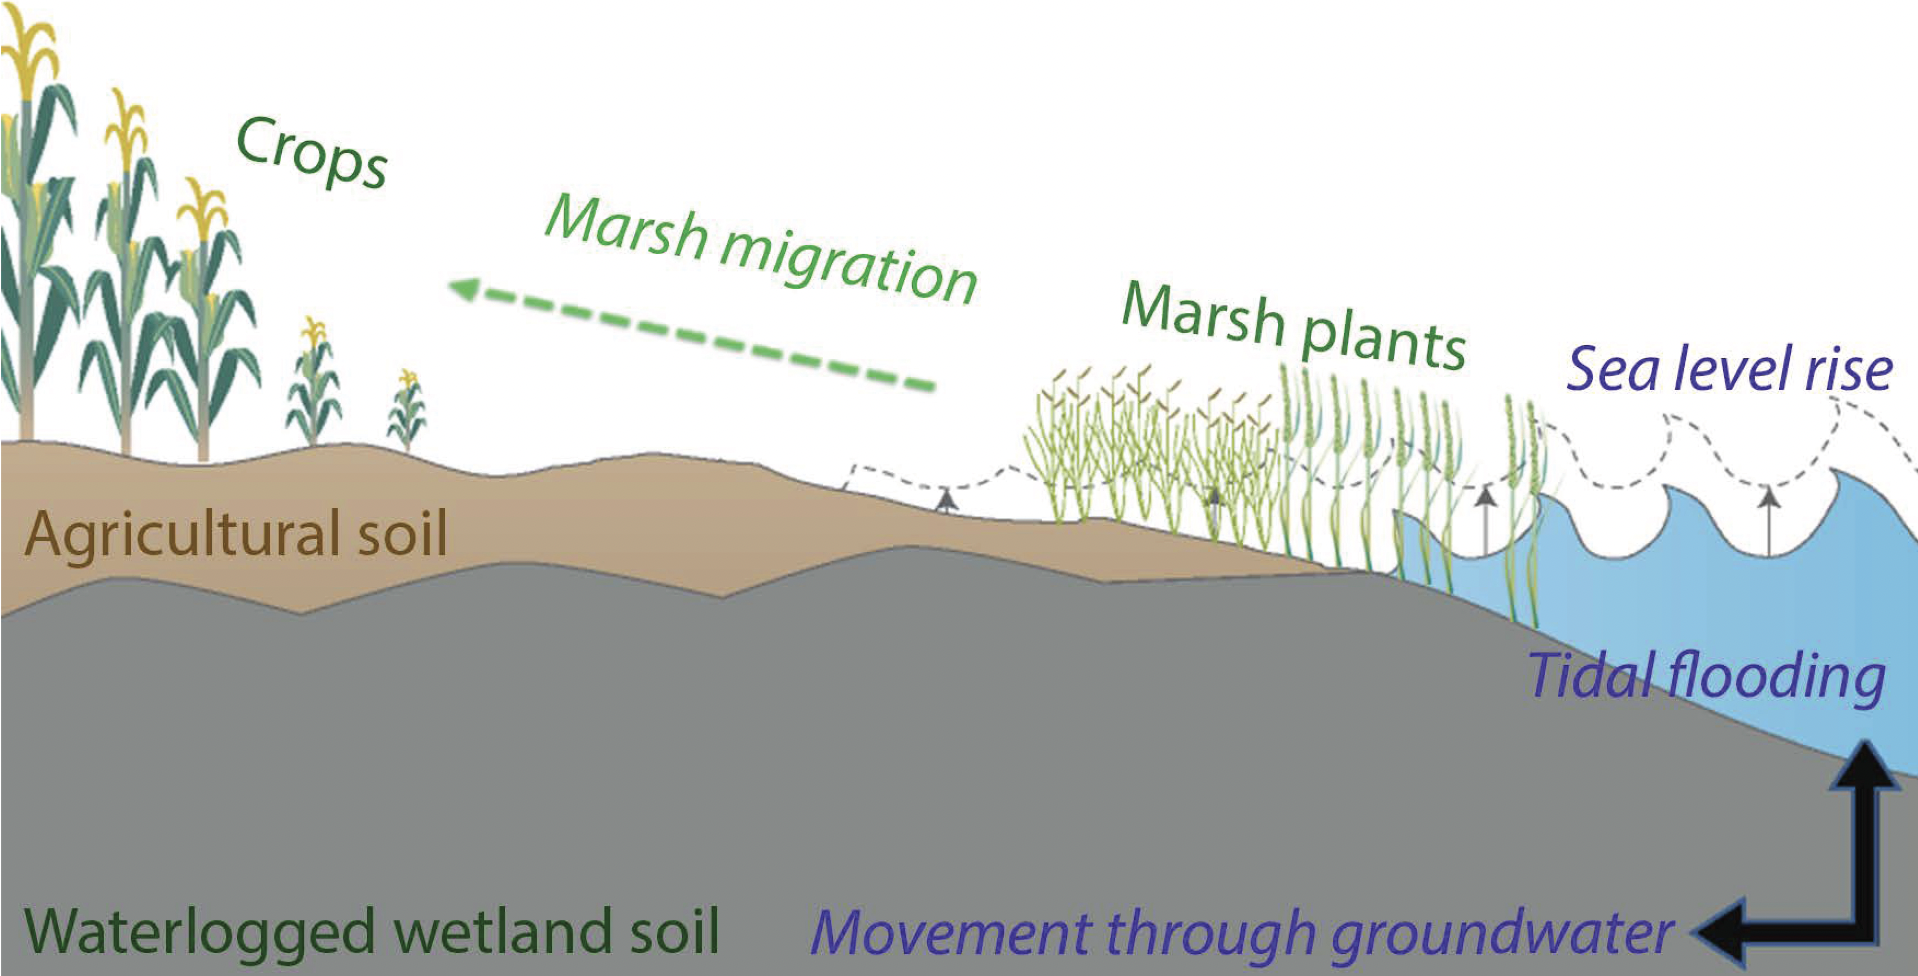
Image 1: Seawater Intrustion affecting Crops (U.S. Department of Agriculture)


# **Equations**

The fundamental process considered in this project is the intrusion of saltwater in aquifers. This can be caused by a variety of reasons. Normally, freshwater flows underground towards the ocean, which prevents seawater from going into coastal aquifers. However, when too much water is pumped out from the aquifer, then the lower water levels cause seawater to flow inland. Droughts can also cause seawater to flow inland and leading to this intrusion of saltwater in aquifers. When sea levels rise, lower elevation coasts then experience this seawater intrusion process. Image 2 is a nice representation of how saltwater intrusion occurs in aquifers. We created this model as an attempt to simulate and describe this process over a 100 year period and reaches a steady state at 500 years. In this simulation, freshwater is extracted from a ditch and we are focused on a the interface that is 590 meters from the coastline. As freshwater is pumped out from the ditch, the interface moves position. As more time passes and the interface continues to move, it eventually reaches its steady state position.

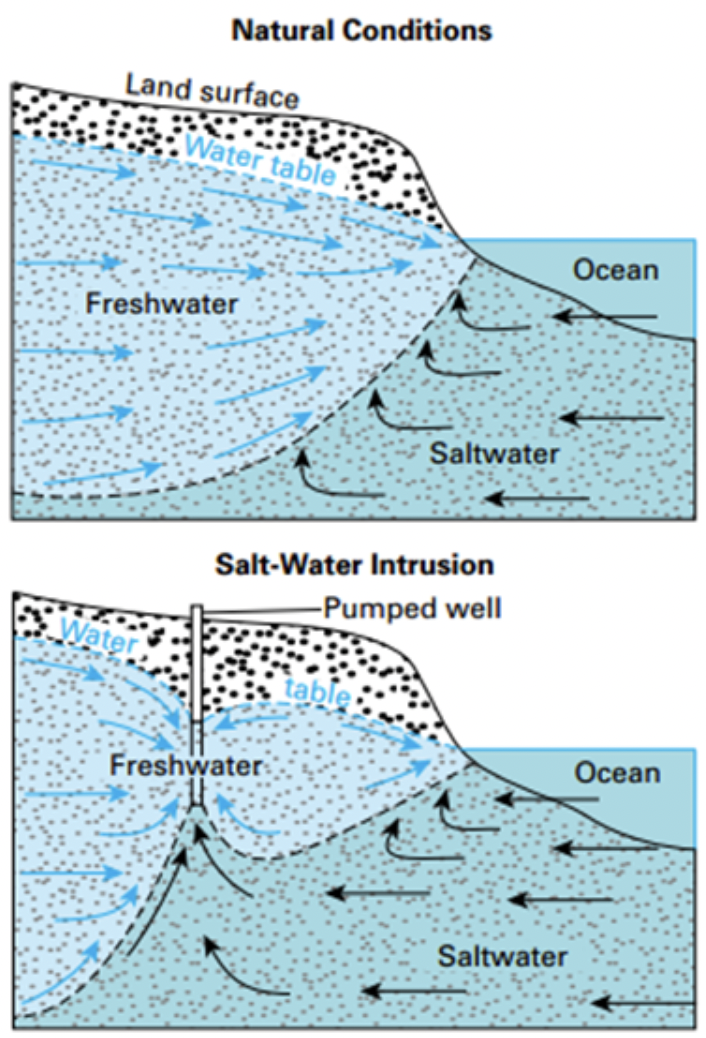

Image 2: Seawater Intrusion Process (Florida Museum: Thompson Earth Systems Institute)


We are mainly concerned with simultaneously solving equations (1) and (2) to understand the change in the interface position. Equation (1) is the differentiated discharge vector, which represents the interface flow of water in the vertical cross section. The presence of the interface explains the subtraction of the last term in the equation. Equation (2) is the differentiated salt discharge vector, which represents the movement of the interface. Equation (1) is derived from the discharge vector (Image 3). Then, the Boussinesq approximation makes the mass balance equation be replaced by a volume balance, so the divergence of the discharge vector equals the total inflow. Differentiating this results in equation (1). Equation (2) is derived from the continuity equation for flow in the saltwater, which is integrated for the salt discharge. Then, we get the divergence of salt discharge from Image 4 and differentiating it produces equation (2). We are solving for zeta, which is the position of the interface during upconing.

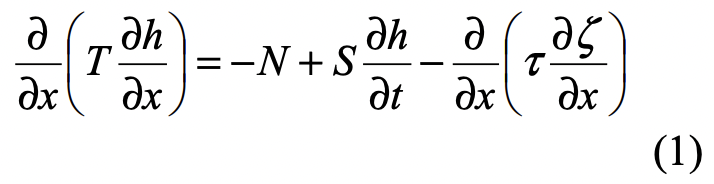
Image 3

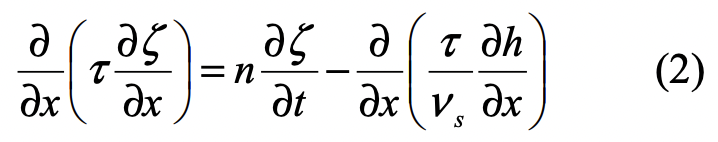
Image 4


All of our terms, parameters, initial coniditions, and boundary conditions are defined and described in our code below along with their units if specified in the paper. The paper set S, the storage coefficient, equal to 0. We ran into a few errors wiht S as zero, such as getting divide by zero errors. So, we decided to set S equal to a really small number close to 0. The value of the infiltration of freshwater, N, was not specified in the paper. So we decided to set N equal to 0 in order to simplify our solution. Additionally, we used the equation from Image 5 to find our initial boundary condition of zeta, which is the position of the interface. We used the same equation to describe the initial boundary conditions for flow when water is pumped from the ditch. Lastly, Image 6 shows the steady state of the interface, meaning the change in position of the interface with respect to time is 0.

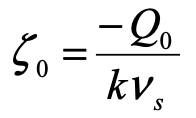
Image 5

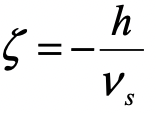
Image 6

The assumptions we make are described by the first three bullet points outlined in the introduction (the same as the assumptions from the paper). These assumptions simplify the problem and allows for the problem to be generalized to a wider range of scenarios.

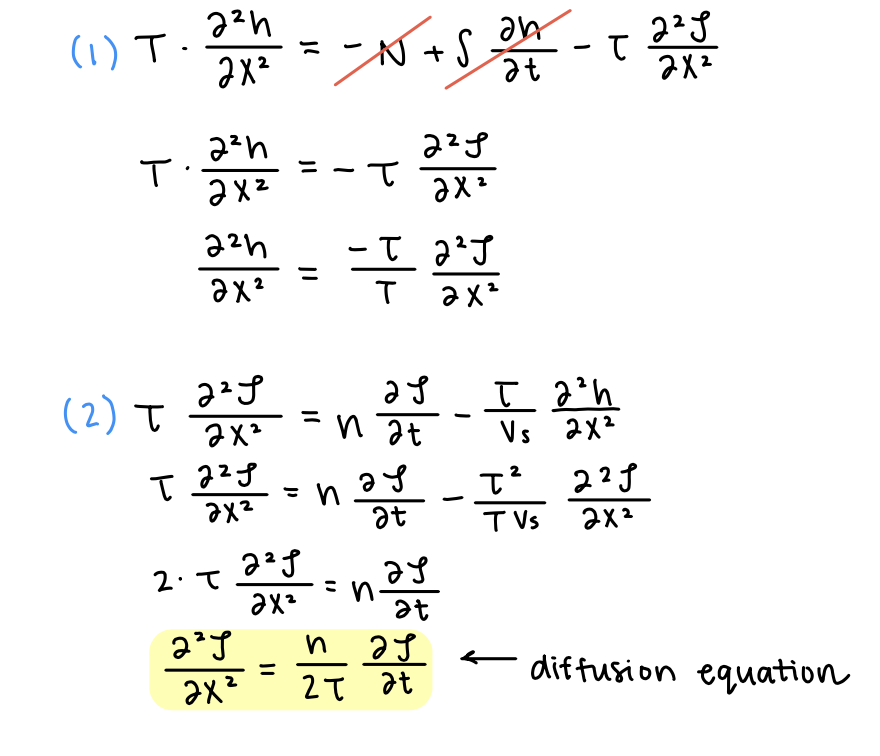

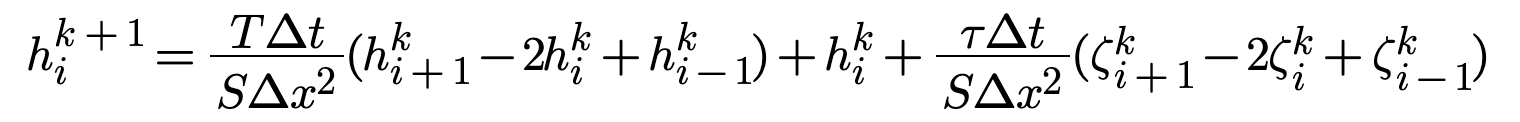

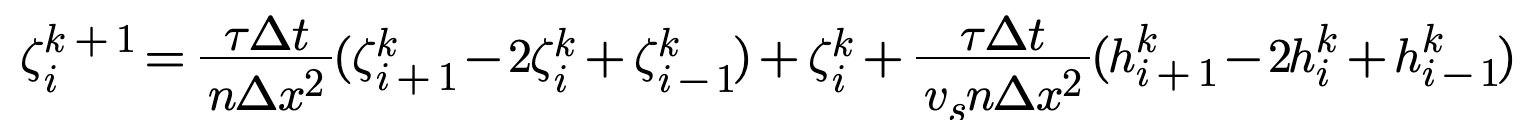

# **Numerical Methods**

The numerical method we chose to implement was Foward Euler Diffusion and we used Dirichlet boundary conditions. We began by importing the necessary packages and tools and defining parameters and initial conditions. Then, we defined the initial boundary conditions. Then, we discretized equations (1) and (2) in order to create our matrices. We then set the boundary conditions for both zeta and h. We solved 

We decided to use this numerical method because Bakker used a block-centered finite difference scheme, which the two are fairly similar. Forward Euler provided a fairly simple approach to solving these partial differential equations.

In [4]:
#Importing tools
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d
import pandas as pd
import csv
from sympy import Derivative
from scipy.sparse import spdiags

In [8]:
# Parameters

k = 2       #m/d, hydraulic conductivity of freshwater
n = 0.2     #effective porosity
S = 1**(-10)    #storage coefficient, porosity of average soil
H = 45      #m, thickness of aquifer
zb = -45    #m, bottom of aquifer
zt = 0      #m, top of aquifer
L = 1000    #m, length of the cross section
W = 1       #m, width of the cross-section normal to the plane of flow
vs = 0.025  #dimensionless density
dis = 590   #m, distance of ditch from coastline
x0 = 0      #m, coastline
tf = 182500 #days in 500 yrs
dt = 365/2  #days, time step
h0 = 0.05   #m, head in the freshwater zone at x=0 m
N = 0       #infiltration of freshwater

T = k*(zt-zb) #transmissivity
tau = k*vs*(zt-zb) #salt transmissivity

dx = 10     #m, distance time step

# Boundary Conditions
Q0 = 0.1    #m^2/d, the uniform flow towards the coast
zeta0 = -Q0/(k*vs)  #initial boundary condition at the coast

Q0d = 0.05  #m^2/d, flow when water is pumped from the ditch
zeta0d = -Q0d/(k*vs) #initial boundary condition at the coast when water is pumped from ditch

# Steady state
zetaf = -h0/vs


#discretizing
t = np.linspace(0,36500,500)    #100 years in days time stepped by 182.5 days
x = np.linspace(0,L,L+1)        #m, cross section
z = np.linspace(zb,zt,500)      #m, depth of aquifer

Cz = tau*dt/(n*dx**2)

In [16]:
data = np.array([-0.5*Cz*np.ones(L+1), (1+Cz)*np.ones(L+1), -0.5*Cz*np.ones(L+1)])
diags = np.array([-1, 0, 1])
Z1 = spdiags(data, diags,L-1,L-1).toarray()

data = np.array([0.5*Cz*np.ones(L+1), (1-Cz)*np.ones(L+1), 0.5*Cz*np.ones(L+1)])
diags = np.array([-1, 0, 1])
Z2 = spdiags(data, diags,L-1,L-1).toarray()

H = np.zeros((L-1,500))
zeta = np.zeros((L-1,500))
zeta[:,0] = zeta0
zeta[-1,:] = zetaf


for i in range(0,len(t)-1):
    zeta[:,i+1] = np.linalg.inv(Z1)@(Z2@zeta[:,i])
    H[:,i+1] = (-tau/T)*zeta[:,i+1]


Z = np.zeros((L+1,500))   #final matrix
Z[:,0] = zeta0
Z[1:-1] = zeta[0:,:]
Z[-1,:] = zetaf

[[-2.          0.          0.         ...  0.          0.
   0.        ]
 [-2.          0.93127581 -1.09606097 ... -0.01117034 -0.01115912
  -0.01114793]
 [-2.          0.14809447 -0.67515269 ... -0.02234012 -0.02231768
  -0.02229531]
 ...
 [-2.          0.14809447 -0.67515269 ... -0.02234012 -0.02231768
  -0.02229531]
 [-2.          0.93127581 -1.09606097 ... -0.01117034 -0.01115912
  -0.01114793]
 [-2.         -2.         -2.         ... -2.         -2.
  -2.        ]]


In [17]:
#Display final zeta and h results

print(Z)
print(H)

[[-2.          0.          0.         ...  0.          0.
   0.        ]
 [-2.          0.93127581 -1.09606097 ... -0.01117034 -0.01115912
  -0.01114793]
 [-2.          0.14809447 -0.67515269 ... -0.02234012 -0.02231768
  -0.02229531]
 ...
 [-2.          0.14809447 -0.67515269 ... -0.02234012 -0.02231768
  -0.02229531]
 [-2.          0.93127581 -1.09606097 ... -0.01117034 -0.01115912
  -0.01114793]
 [-2.         -2.         -2.         ... -2.         -2.
  -2.        ]]
[[ 0.         -0.0232819   0.02740152 ...  0.00027926  0.00027898
   0.0002787 ]
 [ 0.         -0.00370236  0.01687882 ...  0.0005585   0.00055794
   0.00055738]
 [ 0.          0.01064589  0.01359225 ...  0.00083772  0.00083688
   0.00083604]
 ...
 [ 0.          0.01064589  0.01359225 ...  0.00083772  0.00083688
   0.00083604]
 [ 0.         -0.00370236  0.01687882 ...  0.0005585   0.00055794
   0.00055738]
 [ 0.         -0.0232819   0.02740152 ...  0.00027926  0.00027898
   0.0002787 ]]


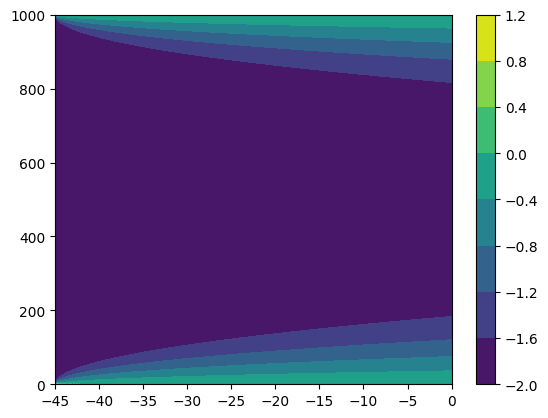

In [18]:
plt.contourf(z,x,Z)
plt.colorbar()
plt.show()

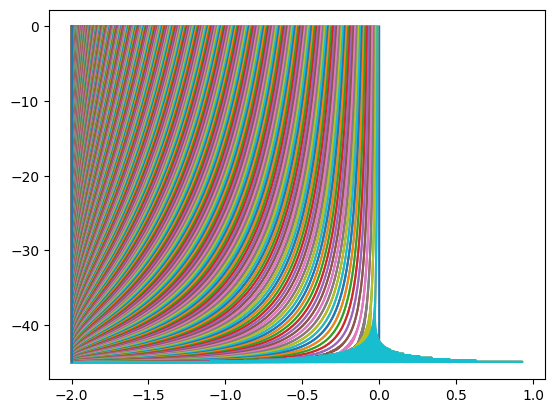

In [22]:
for i in Z:
    plt.plot(i,z)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1001,) and (500,)

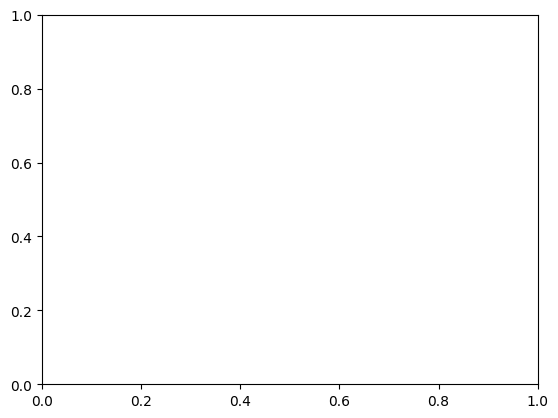

In [23]:
plt.plot(x,z)
plt.show()

# **References**


https://www.epa.gov/arc-x/climate-adaptation-and-saltwater-intrusion#:~:text=Saltwater%20intrusion%20can%20result%20in,waters%20for%20drinking%20water%20utilities.



https://www.climatehubs.usda.gov/hubs/northeast/topic/saltwater-intrusion-growing-threat-coastal-agriculture


https://www.frontiersin.org/journals/water/articles/10.3389/frwa.2021.720557/full


https://link.springer.com/article/10.1007/BF00872240

https://www.floridamuseum.ufl.edu/earth-systems/blog/tell-me-about-saltwater-intrusion-in-florida/